# Generative AI for Data Science Tasks

## Synthetic Data Generation for Data Augmentation

In many real-world applications, datasets are often imbalanced, meaning that some classes have far fewer samples than others. For instance, in fraud detection, there may be significantly fewer fraudulent transactions compared to legitimate ones. This imbalance can negatively impact the performance of machine learning models, as they may become biased towards the majority class. To address this, synthetic data generation techniques can be used to create additional data points for the minority class, effectively balancing the dataset and improving model performance.

**Applications of Synthetic Data**

- *Fraud Detection*: In credit card fraud detection, fraud cases are rare. Generating synthetic fraud cases can help balance the dataset and improve the model’s ability to detect fraudulent transactions.
- *Medical Datasets*: In medical research, obtaining sufficient data for rare diseases can be challenging. Synthetic data generation helps augment datasets, providing more examples for training machine learning models.
- *Image Recognition*: In scenarios where labeled images are expensive or time-consuming to collect, synthetic data can be generated using techniques such as Generative Adversarial Networks (GANs) or image augmentation to increase the number of training examples.

We’ll use Python libraries like scikit-learn and imblearn to generate synthetic data for imbalanced datasets. Specifically, we’ll apply the **SMOTE (Synthetic Minority Over-sampling Technique)** algorithm to create synthetic examples of the minority class.

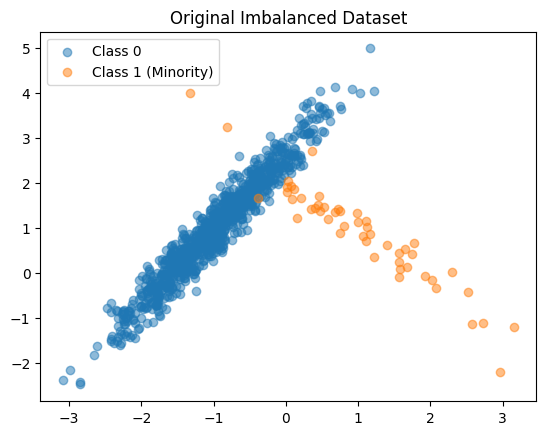

In [1]:
# pip install imbalanced-learn scikit-learn
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import numpy as np

# Generate an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1,
                           weights=[0.95, 0.05], flip_y=0, random_state=42)

# Plot the original imbalanced dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1 (Minority)', alpha=0.5)
plt.legend()
plt.title("Original Imbalanced Dataset")
plt.show()

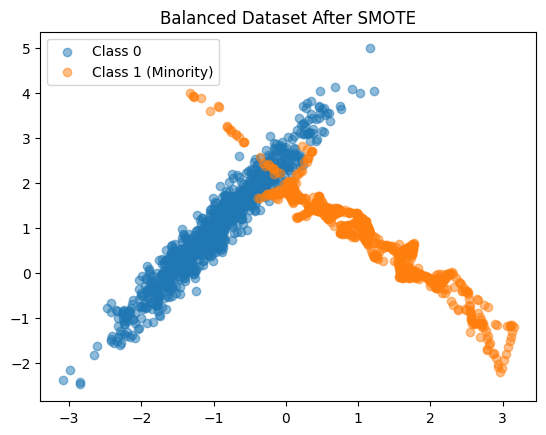

In [2]:
# Apply SMOTE for generating synthetic data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Plot the new dataset after applying SMOTE
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Class 1 (Minority)', alpha=0.5)
plt.legend()
plt.title("Balanced Dataset After SMOTE")
plt.show()

In [3]:
# Training a Classifier on the Augmented Dataset
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       180
           1       0.98      0.98      0.98       200

    accuracy                           0.98       380
   macro avg       0.98      0.98      0.98       380
weighted avg       0.98      0.98      0.98       380



**SMOTE: Synthetic Minority Oversampling Technique**

*What is SMOTE?*

Synthetic Minority Oversampling Technique (SMOTE) is a data augmentation technique used in imbalanced classification problems to generate synthetic samples for the minority class.

- Instead of random oversampling, which duplicates existing samples, SMOTE creates new synthetic samples by interpolating between existing minority class samples.
- This helps prevent overfitting and improves classifier performance.

*Mathematical Formulation of SMOTE*

Given a dataset with:
- Majority class ($ X_{\text{maj}} $): $ n_{\text{maj}} $ samples.
- Minority class ($ X_{\text{min}} $): $ n_{\text{min}} $ samples.

If $ n_{\text{maj}} \gg n_{\text{min}} $, SMOTE generates synthetic samples for $ X_{\text{min}} $ to balance the dataset.


*Steps of SMOTE Algorithm*

*1. Select a Minority Class Sample*

For each minority sample $ x_i $, find its k-nearest neighbors in the minority class using Euclidean distance:

$$
d(x_i, x_j) = \sqrt{\sum_{m=1}^{M} (x_{i,m} - x_{j,m})^2}
$$

where:
- $ x_i, x_j $ are feature vectors in $ M $-dimensional space.
- $ d(x_i, x_j) $ is the distance between two points.


*2. Randomly Choose a Neighbor*

From the k-nearest neighbors, randomly select one, denoted as $ x_{NN} $.

*3. Generate a Synthetic Sample*

A new sample is generated by linear interpolation between $ x_i $ and $ x_{NN} $:

$$
x_{\text{new}} = x_i + \lambda (x_{NN} - x_i)
$$

where:
- $ \lambda \sim U(0,1) $ is a random number from a uniform distribution.

This ensures that the new point lies on the line segment between $ x_i $ and $ x_{NN} $.


*Example in a 2D Space*

Consider two minority class samples:
- $ x_i = (2, 3) $
- $ x_{NN} = (5, 7) $

A synthetic point is generated as:

$$
x_{\text{new}} = (2,3) + 0.5 \times [(5,7) - (2,3)]
$$

$$
x_{\text{new}} = (2,3) + (1.5,2)
$$

$$
x_{\text{new}} = (3.5, 5)
$$

This ensures the synthetic sample is between existing points.


*Pseudocode for SMOTE*

For each minority class sample $ x_i $:
1. Find k-nearest neighbors within the minority class.
2. Randomly choose a neighbor $ x_{NN} $.
3. Compute a synthetic sample using:
       $ x_{\text{new}} = x_i + \lambda (x_{NN} - x_i) $,
       where $ \lambda \sim U(0,1) $.
4. Repeat until the minority class is sufficiently oversampled.

![smote](./images/ds1.png)

## Text Generation With Transformers

Transformers have revolutionized Natural Language Processing (NLP) by introducing a new architecture that allows models to focus on different parts of a sequence simultaneously using an attention mechanism. This contrasts with older models like Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks, which process sequences sequentially.

*Key Benefits of Transformers in NLP:*

- Parallelization: Transformers process all words in a sentence at once, making them faster and more efficient for training on large datasets.
- Contextual Understanding: They can capture long-range dependencies in text, meaning they understand the context of a word based on its position relative to other words in the sentence.
- Pre-trained Models: Large pre-trained models like BERT, GPT, and T5 can be fine-tuned for specific tasks, such as text classification, text generation, question-answering, and more.

*GPT (Generative Pretrained Transformer):* One of the most famous Transformer-based models is GPT, particularly GPT-2 and GPT-3, which are designed specifically for text generation tasks. GPT models are trained in an autoregressive fashion, where they predict the next word in a sentence based on the previous words, making them highly effective at generating coherent and contextually appropriate text.

In this example, we'll use Hugging Face's transformers library to generate text using a pre-trained GPT-2 model. Hugging Face provides easy access to a wide range of pre-trained Transformer models for different NLP tasks, including text generation.

In [4]:
# pip install transformers torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

# Set the model to evaluation mode
model.eval()

c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\utils\generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\vmelnyk2\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\utils\generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

Next step: *Generate Text Based on a Prompt*

We'll generate text based on a simple input prompt like "Once upon a time."

In [6]:
import torch

# Define the input prompt
prompt = "Once upon a time"

# Tokenize the input
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate text
output = model.generate(input_ids, max_length=50, num_return_sequences=1)

print(output[0])

# Decode and print the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


tensor([7454, 2402,  257,  640,   11,  262,  995,  373,  257, 1295,  286, 1049,
        8737,  290, 1049, 3514,   13,  383,  995,  373,  257, 1295,  286, 1049,
        3514,   11,  290,  262,  995,  373,  257, 1295,  286, 1049, 3514,   13,
         383,  995,  373,  257, 1295,  286, 1049, 3514,   11,  290,  262,  995,
         373,  257])
Once upon a time, the world was a place of great beauty and great danger. The world was a place of great danger, and the world was a place of great danger. The world was a place of great danger, and the world was a


*Explanation of Key Parameters in model.generate:*

- `max_length`: The maximum length of the generated text.
- `num_return_sequences`: The number of different sequences to generate (in this case, 1).
- `input_ids`: The tokenized input prompt used as the starting point for text generation.

*Adjusting Parameters for Better Control*

You can adjust various parameters in the generate function to influence the output. For example:

- *Temperature*: Controls the randomness of predictions. Lower values (closer to 0) make the model more deterministic, while higher values increase diversity.

```
output = model.generate(input_ids, max_length=100, num_return_sequences=1, temperature=0.7)
```

- *Top-k Sampling*: Only sample from the top k most likely next words, helping to reduce the chances of unlikely words being selected.

```
output = model.generate(input_ids, max_length=100, num_return_sequences=1, top_k=50)
```

- *Top-p (Nucleus) Sampling*: Sample from the smallest set of words whose cumulative probability exceeds p.

```
output = model.generate(input_ids, max_length=100, num_return_sequences=1, top_p=0.9)
```

$a_0, a_1, .., a_n$ -> $a_{n+1}$ $\newline$
$0.4$: $b_{1}$, $0.5$: $b_{2}$ -> sampling from these two

In [7]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)
model.eval()

# Input prompt
prompt = "Artificial intelligence is"

# Tokenize the input
input_ids = tokenizer.encode(prompt, return_tensors="pt")

# Generate text with top-p sampling and temperature adjustment
output = model.generate(input_ids, max_length=100, num_return_sequences=1, temperature=0.5, top_p=0.9, do_sample=True)

# Decode the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Artificial intelligence is not the only technology that is being developed.

"The technology is being developed in the field of artificial intelligence," said Dr. Gopal Krishna, head of the AI research department at the National Institute of Science and Technology (NIST) in Bangalore. "The technology is being developed in the field of artificial intelligence, so there are many ways of developing it."

The AI research department at NIST is working on a new AI technology that will allow for the development


In [8]:
output = model.generate(input_ids, max_length=100, num_return_sequences=1, temperature=0.9, top_k=10, do_sample=True)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Artificial intelligence is an emerging discipline, where the potential for artificial intelligence is not limited to the realm of computer science. It is now a major concern for many researchers, and a major concern among the AI community. In an effort to address this, the University of California, San Diego, recently announced their new "AI: Artificial Intelligence for Human Needs" program. This new AI program will allow AI researchers to create and develop artificial intelligence that is more capable than traditional human-computer interactions. The program


In [9]:
output = model.generate(input_ids, max_length=100, num_return_sequences=1, temperature=0.1, do_sample=True)

generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(generated_text)


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Artificial intelligence is a new field of research that has been in the works for a while now. It is a field that has been in the works for a while now. It is a field that has been in the works for a while now. It is a field that has been in the works for a while now. It is a field that has been in the works for a while now. It is a field that has been in the works for a while now. It is a field that


### More of a Mathematical Explanation of text generation with Transformers:

Each input token is embedded into a vector space:
$$
x_i \in \mathbb{R}^{d}
$$
where $ d $ is the embedding dimension.

Positional encoding is added:
$$
z_i = x_i + PE(i)
$$
where $ PE(i) $ is the positional encoding function.

*Self-Attention Mechanism*

Given an input sequence of $ n $ tokens, we compute self-attention using query (Q), key (K), and value (V) matrices:

$$
Q = XW^Q, \quad K = XW^K, \quad V = XW^V
$$

where:
- $ X \in \mathbb{R}^{n \times d} $ is the input token matrix.
- $ W^Q, W^K, W^V $ are learned parameter matrices.

The scaled dot-product attention is computed as:

$$
\text{Attention}(Q, K, V) = \text{softmax} \left( \frac{Q K^T}{\sqrt{d_k}} \right) V
$$

where:
- $ d_k $ is the key dimension.
- Softmax ensures attention weights sum to 1.

Multi-head attention combines multiple attention heads:

$$
\text{MultiHead}(X) = \text{Concat}(\text{head}_1, ..., \text{head}_h) W^O
$$

where $ h $ is the number of heads.


*Decoder for Text Generation*

In causal language models (e.g., GPT), the decoder generates text autoregressively:

$$
P(y_t | y_{<t}, X) = \text{softmax}(W_o h_t)
$$

where:
- $ h_t $ is the hidden state at time step $ t $.
- $ W_o $ projects to vocabulary size.

Each token is generated one at a time, using:

$$
y_t = \arg\max P(y_t | y_{<t}, X)
$$

